# PyCon UK: Alzheimer's Disease Challenge Hackathon

Important! make sure you have added your email and name here before proceeding further: https://tinyurl.com/y76vk384

In [1]:
# To support both python 2 and python 3
# from __future__ import division, print_function, unicode_literals

import os
from zipfile import ZipFile
from six.moves import urllib


import sys
print(sys.version)

3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]


In [2]:
!mkdir -p ../data
TADPOLE_PATH = os.path.join("..", "data")

* Check your email, you will have received a login for lda.loni.usc.edu.

Then download the zipfile from: https://ida.loni.usc.edu/pages/access/studyData.jsp?categoryId=43&subCategoryId=94

* After log-in, select Projects -> ADNI -> Download -> Study Data
* In the "Find" entry box type "tadpole" <ENTER>
* Select "Tadpole Challenge Data" and click on the DOWNLOAD button
* Once "tadpole_challenge.zip" is downloaded, save it under ../data/
* The function below will extract the files for you into the ../data folder.

In [16]:

def fetch_tadpole_data(tadpole_path=TADPOLE_PATH):
    if not os.path.isdir(tadpole_path):
        os.makedirs(tadpole_path)
    zip_path = os.path.join(tadpole_path, "tadpole_challenge.zip")
    if not os.path.isdir(zip_path):
        raise ValueError("please move the downloaded zipfile to %s folder" % TADPOLE_PATH)
    print("extracting from %s" % zip_path)
#     urllib.request.urlretrieve(tadpole_url, zip_path)
    with ZipFile(zip_path) as tadpole_zip:

        tadpole_zip.extractall(path=tadpole_path)
        tadpole_zip.close()
        
fetch_tadpole_data()

# Make Leaderboard datasets

First generate the leaderboard datasets; 
* LB1 (Full training set - all subjects)
* LB2 (Selection of subjects for prediction & testing against)

In [5]:
from makeLeaderboardDataset import *
import pandas as pd

generateLBdatasets(inputFolder='../data/', outputFolder='../data/')


TADPOLE_LB1_LB2.csv created in ../data/
columns ['RID', 'PTID', 'VISCODE', 'SITE', 'D1', 'D2', 'LB1', 'LB2', 'COLPROT', 'ORIGPROT']
TADPOLE_LB4.csv created in ../data/
Submission skeleton TADPOLE_Submission_Leaderboard_TeamName.csv created in ../data/


# Load in datasets

## LB1: TADPOLE Standard training set.

This training dataset contains medical data including:
* MRI scans
* PET scans
* DTI scans
* Cognitive assessment data
* Demographic data
* Genetic data
* CSF data

## LB2: TADPOLE Standard prediction set.

This is a subset of LB1; the list of subjects to be predicted in the final submission


See the github readme file ["https://github.com/swhustla/pycon2017-alzheimers-hack/blob/master/README.md"] for more information and explanations on the data sources.




In [6]:
def load_tadpole_data(tadpole_path=TADPOLE_PATH):
    csv_path_lb1_lb2 = os.path.join(tadpole_path, "TADPOLE_LB1_LB2.csv")
    return pd.read_csv(csv_path_lb1_lb2, low_memory=False)

tadpole_lb1_lb2 = load_tadpole_data()

# Data Exploration

In [7]:
tadpole_lb1_lb2.head()

,RID,PTID,VISCODE,SITE,D1,D2,LB1,LB2,COLPROT,ORIGPROT,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,1,0,ADNI1,ADNI1,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,1,0,ADNI1,ADNI1,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,1,0,ADNI1,ADNI1,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,1,0,ADNI1,ADNI1,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,1,0,ADNI1,ADNI1,...,,,,,,,,,,


In [8]:
print(list(tadpole_lb1_lb2.columns)[:30])

['RID', 'PTID', 'VISCODE', 'SITE', 'D1', 'D2', 'LB1', 'LB2', 'COLPROT', 'ORIGPROT', 'EXAMDATE', 'DX_bl', 'DXCHANGE', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting']


In [9]:
print(tadpole_lb1_lb2.info())
tadpole_lb1_lb2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12012 entries, 0 to 12011
Columns: 1909 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(10), object(1827)
memory usage: 175.0+ MB
None


,RID,SITE,D1,D2,LB1,LB2,DXCHANGE,AGE,PTEDUCAT,APOE4,...,EcogSPOrgan_bl,EcogSPDivatt_bl,EcogSPTotal_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M
count,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,12012.000000,8475.000000,12012.000000,12012.000000,12000.000000,...,5504.000000,5637.000000,5767.000000,8781.000000,120.000000,5750.000000,12012.000000,12012.000000,12012.000000,12012.000000
mean,2336.799118,72.953713,0.994172,0.588745,0.928571,0.071429,2.103363,73.760931,15.986097,0.550167,...,1.651214,1.845027,1.693177,1.246474,1.610021,1.202087,1.925861,23.062975,22.977772,22.818931
std,1864.695129,107.984561,0.076119,0.492082,0.257550,0.257550,1.077779,7.043616,2.829938,0.660570,...,0.838895,0.894895,0.700158,0.146611,0.330875,0.222027,1.943552,23.274829,23.210868,23.020114
min,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.400000,4.000000,0.000000,...,1.000000,1.000000,1.000000,0.697264,1.155000,0.838537,0.000000,0.000000,0.000000,0.000000
25%,658.000000,21.000000,1.000000,0.000000,1.000000,0.000000,1.000000,69.400000,14.000000,0.000000,...,1.000000,1.000000,1.153850,1.157480,1.335000,1.019440,0.490075,5.868850,6.000000,6.000000
50%,1378.000000,41.000000,1.000000,1.000000,1.000000,0.000000,2.000000,73.700000,16.000000,0.000000,...,1.250000,1.500000,1.435900,1.254910,1.490000,1.125370,1.496235,17.918000,18.000000,18.000000
75%,4371.000000,116.000000,1.000000,1.000000,1.000000,0.000000,3.000000,78.800000,18.000000,1.000000,...,2.000000,2.333330,2.051280,1.338750,1.835000,1.374980,2.904860,34.786900,36.000000,36.000000
max,5296.000000,941.000000,1.000000,1.000000,1.000000,1.000000,8.000000,91.400000,20.000000,2.000000,...,4.000000,4.000000,3.948720,1.707170,2.282500,2.025560,10.321700,123.607000,126.000000,120.000000


In [10]:
tadpole_lb1_lb2["DX"].value_counts()

MCI                3801
NL                 2477
Dementia           1686
MCI to Dementia     346
NL to MCI            89
MCI to NL            73
Dementia to MCI      12
NL to Dementia        3
Name: DX, dtype: int64

In [11]:
tadpole_lb1_lb2["DX_bl"].value_counts()

LMCI    4353
CN      3383
EMCI    2319
AD      1568
SMC      389
Name: DX_bl, dtype: int64

In [12]:
tadpole_lb1_lb2["VISCODE"].value_counts()

bl      1737
m06     1618
m12     1485
m24     1326
m18     1293
m36      848
m03      793
m30      750
m48      603
m42      303
m60      264
m72      163
m54      146
m66      138
m78      129
m84      123
m96      100
m108      78
m90       77
m120      33
m102       4
m114       1
Name: VISCODE, dtype: int64

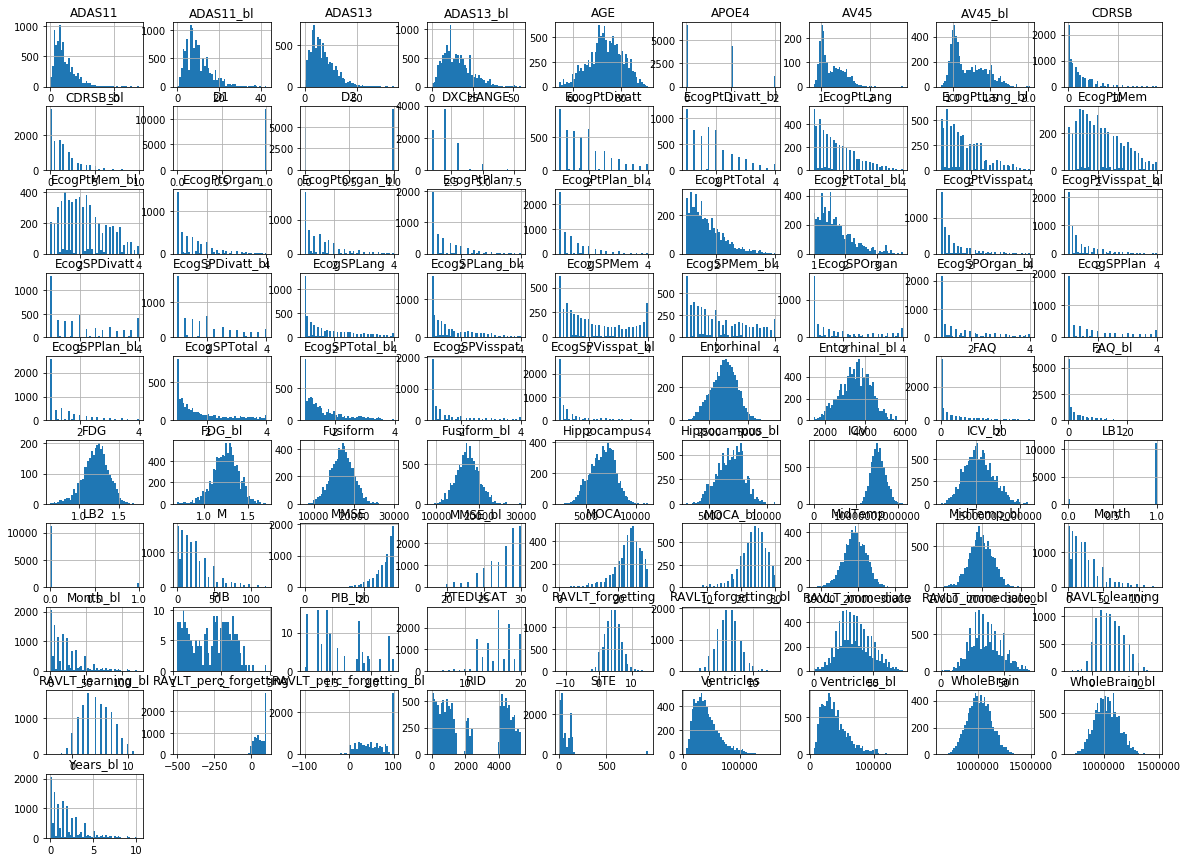

In [14]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
tadpole_lb1_lb2.hist(bins=50, figsize=(20,15))
plt.show()

# Data Preparation

# Plain vanilla model

# pipeline for generating, evaluating and submitting a leaderboard submission
    

Then generate a simple forecast from the training data, and save it as ```TADPOLE_Submission_Pycon_TeamName1.csv```


In [8]:
!python3 TADPOLE_SimpleForecast1.py

Generating forecast ...
Constructing the output spreadsheet ../data/TADPOLE_Submission_Pycon_TeamName1.csv ...


You should replace TeamName1 with your team name and submission index (no underscores allowed)
e.g., TADPOLE_Submission_Pycon_TeamAwesome3.csv

In [9]:
team_name = "TeamFrank1" ## add your own team name here

In [10]:
import os
oldFile = '../data/TADPOLE_Submission_Pycon_TeamName1.csv'
newFile = '../data/TADPOLE_Submission_Pycon_%s.csv' % team_name
os.system('mv %s %s' % (oldFile, newFile))


0

Evaluate the user forecasts from TADPOLE_Submission_Leaderboard_TeamName1.csv against TADPOLE_LB4_dummy.csv (held out dataset) using the evaluation function

In [11]:
os.system('python3 evalOneSubmission.py --leaderboard --d4File %s --forecastFile %s' % ("../data/TADPOLE_LB4_dummy.csv", newFile))

# !python3 evalOneSubmission.py --leaderboard --d4File ../data/TADPOLE_LB4.csv --forecastFile      ../data/TADPOLE_Submission_Leaderboard_Team_frank_test.csv

0

In [ ]:
# Submit (renamed version of) TADPOLE_Submission_Leaderboard_TeamName1.csv to TADPOLE website via the Submit page